# **K-최근접 이웃(KNN : K Nearest Neighbors)**

---

- 목표
    - 와인 정보가 들어있는 데이터 셋을 이용해 와인 등급을 예측하라.
- 알고리즘 : KNN
- 문제유형 : 분류
- 종속변수 : class(등급)
- 데이터셋
    - 파일명 : wine.csv
    - 소개
        - 와인에 대한 데이터입니다. 총 3가지 목푯값으로 이루어진 범주형 변수이기 때문에 다중분류(multiclassification)문제에 해당합니다. 알코올, 밀산, 마그네슘, 색조 등이 독립변수로, 와인등급 class가 종속변수로 사용됩니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [ ]:
# ______.nunique()  : 고윳값 가짓수 출력
# ______.value_counts() : 각 고윳값에 해당하는 개수 출력
data['class'].unique()# 해당 변수의 고윳값 출력

array([0, 1, 2])

In [ ]:
data['class']

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: class, Length: 178, dtype: int64

<AxesSubplot: ylabel='count'>

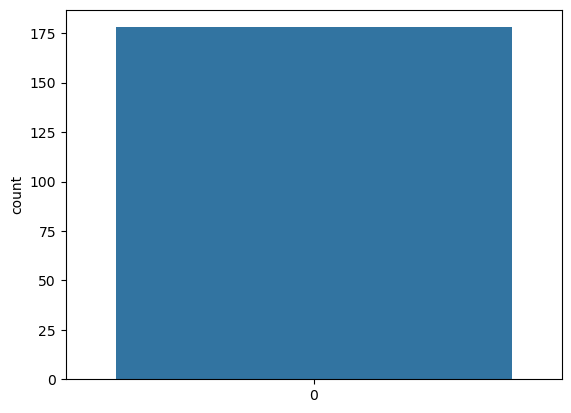

In [ ]:
# sns.barplot(x=data['class'].value_counts().index, y=data['class'].value_counts())
sns.countplot(data['class'])

In [ ]:
# 결측치 확인법
data.isna()
data.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [ ]:
# 방식 01
data = data.dropna() # 결측치가 존재하는 행을 제거
data.dropna(inplace=True)
data.dropna(subset=['alchol']) # 특정 변수상의 결측치가 존재하는 행을 제거

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [ ]:
# 방식 02
data.drop(['alcohol', 'nonflavanoid_phenols'], axis=1) # 결측치가 보이는 특정 변수 제거

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

In [ ]:
# 방식 03
data.fillna(-99) # 결측치를 -99로 채우기, 일반적으로 평균값이나 중윗값을 사용함.
data.fillna(data.mean()) # 결측치를 평균값으로 채우기, 별도의 컬럼명을 지정하지않아도 각 컬럼의 평균값으로 대체됨.


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


### 통상적으로 50% 이상이면 `drop()`을 고려해볼 만 하고, 70~80% 이상이면 가급적 `drop()`을 적용하는 것이 좋습니다.  
### 하지만 경우에 따라서는 90%가 결측치라고 해도, 해당 변수가 프로젝트에서 매우 중요한 역할을 할 거라 예상된다면 어떻게든 활용법을 찾는것이 좋습니다.

In [ ]:
data.fillna(data.median(), inplace=True)

In [ ]:
data.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

st_scaler = StandardScaler()
st_scaler.fit(data) # 학습